In [1]:
# ---------------------- LOGISTIC REGRESSION (Simple Explanation) ----------------------
# Logistic Regression is a supervised classification algorithm.
# It predicts the probability that a data point belongs to a particular class (e.g., 0 or 1).
# It uses the logistic (sigmoid) function to output values between 0 and 1.

# ---------------------- 1. IMPORT REQUIRED LIBRARIES ----------------------

import pandas as pd                           # For loading and handling tabular data
import numpy as np                            # For numerical operations

import matplotlib.pyplot as plt               # For visualizations
import seaborn as sns                         # For statistical plots

from sklearn.model_selection import train_test_split   # Split data into training and test sets
from sklearn.linear_model import LogisticRegression    # Logistic Regression model
from sklearn.metrics import (
    accuracy_score,                           # Metric to measure accuracy
    confusion_matrix,                         # To see correct vs incorrect predictions
    classification_report                     # Detailed precision, recall, f1-score
)


In [2]:
# ---------------------- 2. LOAD THE DATASET ----------------------
# Replacing local path with Kaggle dataset link:
# Kaggle Dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

df = pd.read_csv("diabetes.csv")   # Load the Diabetes dataset
df.head()                          # Display first 5 rows


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# ---------------------- 3. CHECK DATASET INFORMATION ----------------------
# Shows column names, data types, and missing/null value summary.

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# ---------------------- 4. SUMMARY STATISTICS ----------------------
# describe() shows mean, std deviation, min/max, and percentiles
# for all numerical features in the dataset.

df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# ---------------------- 5. CHECK CLASS DISTRIBUTION ----------------------
# Outcome = 0 → No diabetes
# Outcome = 1 → Diabetes
# Helps us see if the dataset is balanced or imbalanced.

df['Outcome'].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

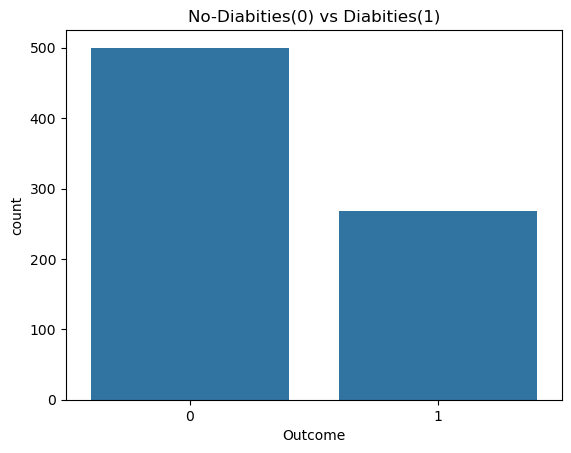

In [6]:
# ---------------------- 6. VISUALIZE CLASS DISTRIBUTION ----------------------
# Countplot shows how many patients fall into each class:
# 0 = No diabetes, 1 = Diabetes.

sns.countplot(x='Outcome', data=df)
plt.title('No-Diabetes (0) vs Diabetes (1)')
plt.show()


In [7]:
# ---------------------- 7. SPLIT FEATURES AND TARGET ----------------------
# X = input features (medical measurements)
# y = target label (0 = no diabetes, 1 = diabetes)
# stratify=y keeps class balance equal in both train and test sets.

X = df.drop('Outcome', axis=1)     # All features except the target
y = df['Outcome']                  # Target labels

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,                 # 20% for testing
    random_state=42,               # For reproducibility
    stratify=y                     # Maintain class balance
)


In [8]:
# ---------------------- 8. TRAIN LOGISTIC REGRESSION MODEL ----------------------
# max_iter=1000 increases the number of optimization steps so the model converges.
# The model learns the relationship between features and the probability of diabetes.

model = LogisticRegression(max_iter=1000)   # Create model with higher iteration limit
model.fit(X_train, y_train)                 # Train the model


LogisticRegression(max_iter=1000)

In [9]:
# ---------------------- 9. MODEL PREDICTION & ACCURACY ----------------------
# model.predict() returns 0 or 1 for each patient.
# accuracy_score compares predictions with actual test labels.

y_pred = model.predict(X_test)                     # Predict on test data

accuracy = accuracy_score(y_test, y_pred)          # Calculate accuracy
print(f"Accuracy: {accuracy:.3f}")                 # Display accuracy


Accuracy: 0.714


In [10]:
# ---------------------- 10. CONFUSION MATRIX ----------------------
# Confusion matrix shows:
# [True Negative, False Positive]
# [False Negative, True Positive]
# Helps us understand where the model predicts correctly or incorrectly.

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[82 18]
 [26 28]]


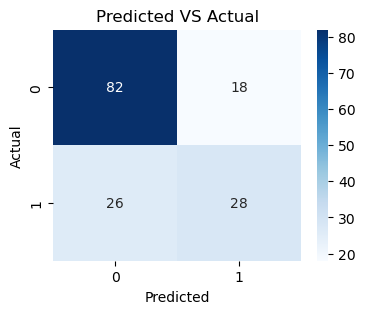

In [11]:
# ---------------------- 11. VISUALIZE CONFUSION MATRIX ----------------------
# Heatmap representation makes it easier to see correct & incorrect predictions.

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")   # 'd' = integer formatting
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()


In [12]:
# ---------------------- 12. CLASSIFICATION REPORT ----------------------
# Shows precision, recall, f1-score, and support for each class (0 and 1).
# Helps evaluate how well the model performs on each category.

print("Classification Report \n")
print(classification_report(y_test, y_pred))


Classification Report 

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [13]:
# ---------------------- 13. INFERENCE ON NEW PATIENT DATA ----------------------
# Provide new medical measurements to predict diabetes probability.
# model.predict() → gives predicted class (0 or 1)
# model.predict_proba() → gives probability for both classes

new_patient = np.array([[2, 130, 70, 25, 100, 28.5, 0.45, 35]])  # Example patient data

new_pred = model.predict(new_patient)[0]          # Predicted class
new_proba = model.predict_proba(new_patient)[0][1]  # Probability of class 1 (diabetes)

print(f"Predicted class (0=no diabetes, 1=diabetes): {new_pred}")
print(f"Predicted probability of diabetes: {new_proba:.3f}")


Predicted class (0=no diabetes, 1=diabetes): 0
Predicted probability of diabetes: 0.253


C:\Users\savij\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\savij\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
